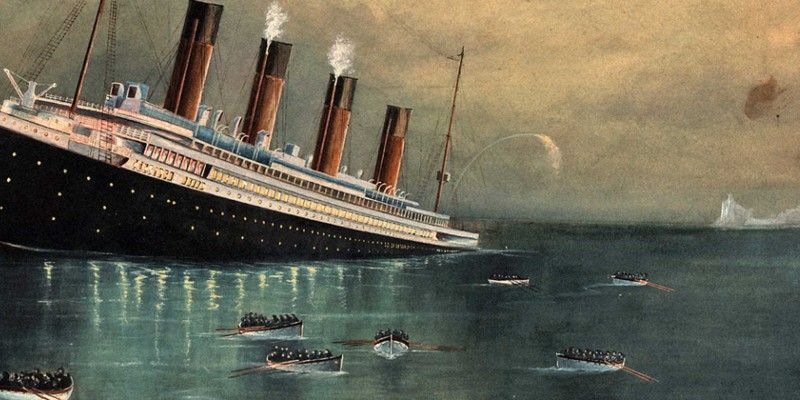

## Welcome to this notebook
### We will do some EDA and Data Cleaning with Feature Engineering and then we will try some predictions and see how logistic regression works for "Dietanic" :))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
testing = pd.read_csv('../input/titanic/test.csv')

### 1- Load Dataset

In [ ]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

In [ ]:
df.info()

We can see we have some NaN, so we will deal with them in feature

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

## 2- EDA + Handlling Missing Data

### In this part i tried to do some usefull EDA and in the meantime handled the missing data so we can proceed to the predictions part 

In [ ]:
df.groupby(['Sex','Survived'])['Survived'].count()

In [ ]:
f, ax = plt.subplots(1,3,figsize=(18,8))
sns.countplot(data=df,x='Sex',ax=ax[0])
ax[0].set_title('Number of Male and Female')
sns.countplot(data=df,x='Survived',hue='Sex',ax=ax[1])
ax[1].set_title('Survived')
sns.barplot(data=df,x='Sex',y='Survived',ax=ax[2])
ax[2].set_title('Sex')
plt.show()

### As you guys can see there is something so interesting and that's dispite of the fact that men were more than women in general, but females survived way more than males.

### Now let's do some research on our features

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12,8))
sns.barplot(data=df,x='Pclass',y='Survived',ax=ax[0])
sns.barplot(data=df,x='Pclass',y='Survived',hue='Sex',ax=ax[1])
plt.show()

### Better Class --> Higher Chance of Survive

In [ ]:
print("Oldest Passenger is: ", df['Age'].max())
print("Youngest Passenger is: ", df['Age'].min())
print("Average Age is: ", df['Age'].mean())

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.boxplot(data=df,x='Pclass',y='Age',ax=ax[0],hue='Survived')
sns.boxplot(data=df,x='Sex',y='Age',ax=ax[1],hue='Survived')
plt.show()

#### So one idea is that we can put mean value for missing entries of "Age" but i guess that's not the best idea. Imagine that missing value was something like 4 years old and we are changing it to the mean(something more than 20 for sure)
#### So what can we do??! Just look at the Name of passengers... They some prefixes like "Mr. Mrs. Master. ..." That's so cool!! :))
#### We can categories them and then find out wich passenger was child, man, woman, ...
#### So let's make a new column for that part:

In [ ]:
df['Prefix'] = 0
testing['Prefix'] = 0

df['Prefix'] = df.Name.str.extract('([A-Za-z]+)\.')
testing['Prefix'] = testing.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(df.Sex,df.Prefix)

In [ ]:
df['Prefix'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
testing['Prefix'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
df.groupby('Prefix')['Age'].mean()

In [ ]:
df.loc[(df.Age.isnull()) & (df.Prefix=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Prefix=='Mrs'),'Age']=36
df.loc[(df.Age.isnull()) & (df.Prefix=='Master'),'Age']=5
df.loc[(df.Age.isnull()) & (df.Prefix=='Miss'),'Age']=22
df.loc[(df.Age.isnull()) & (df.Prefix=='Other'),'Age']=46

testing.loc[(testing.Age.isnull()) & (testing.Prefix=='Mr'),'Age']=33
testing.loc[(testing.Age.isnull()) & (testing.Prefix=='Mrs'),'Age']=36
testing.loc[(testing.Age.isnull()) & (testing.Prefix=='Master'),'Age']=5
testing.loc[(testing.Age.isnull()) & (testing.Prefix=='Miss'),'Age']=22
testing.loc[(testing.Age.isnull()) & (testing.Prefix=='Other'),'Age']=46


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='blue')
ax[0].set_title('Survived')
ax[0].set_xlabel('Age')
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Not Survived')
ax[1].set_xlabel('Age')
plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(18,8))
sns.countplot(data=df,x='Embarked',ax=ax[0])
sns.countplot(data=df,x='Embarked',ax=ax[1],hue='Sex')
sns.countplot(data=df,x='Embarked',ax=ax[2],hue='Pclass')

In [ ]:
df['Embarked'].fillna('S',inplace=True)
testing['Embarked'].fillna('S',inplace=True)

In [ ]:
df.drop(labels=['Cabin', 'Ticket'],axis=1,inplace=True)
testing.drop(labels=['Cabin', 'Ticket'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(2,4),dpi=100)
sns.boxplot(data=df,x='Survived',y='Age')

In [ ]:
plt.figure(figsize=(18,15),dpi=150)
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu",lw=0.2, annot_kws={'size':20})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1

In [ ]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Prefix'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [ ]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()
grid_param = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}
grid_model = GridSearchCV(model, grid_param)
grid_model.fit(X_scaled_train,y_train)
y_pred = grid_model.predict(X_scaled_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
grid_model.best_params_

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
plot_confusion_matrix(grid_model,X_scaled_test,y_test,cmap=plt.cm.Blues)

In [ ]:
print(classification_report(y_test,y_pred))

## Thnks for reading. If you liked my notebook and find it useful please upvote for me =))